/tmp/ipython-input-4063296849.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="2y")
[*********************100%***********************]  1 of 1 completed



Predicted vs Actual Closing Prices (First 10):
Predicted: 218.18, Actual: 213.58
Predicted: 215.36, Actual: 217.74
Predicted: 212.95, Actual: 220.19
Predicted: 221.37, Actual: 223.20
Predicted: 219.92, Actual: 220.99
Predicted: 220.23, Actual: 223.30
Predicted: 220.64, Actual: 217.37
Predicted: 221.05, Actual: 221.59
Predicted: 214.48, Actual: 222.65
Predicted: 222.09, Actual: 223.34


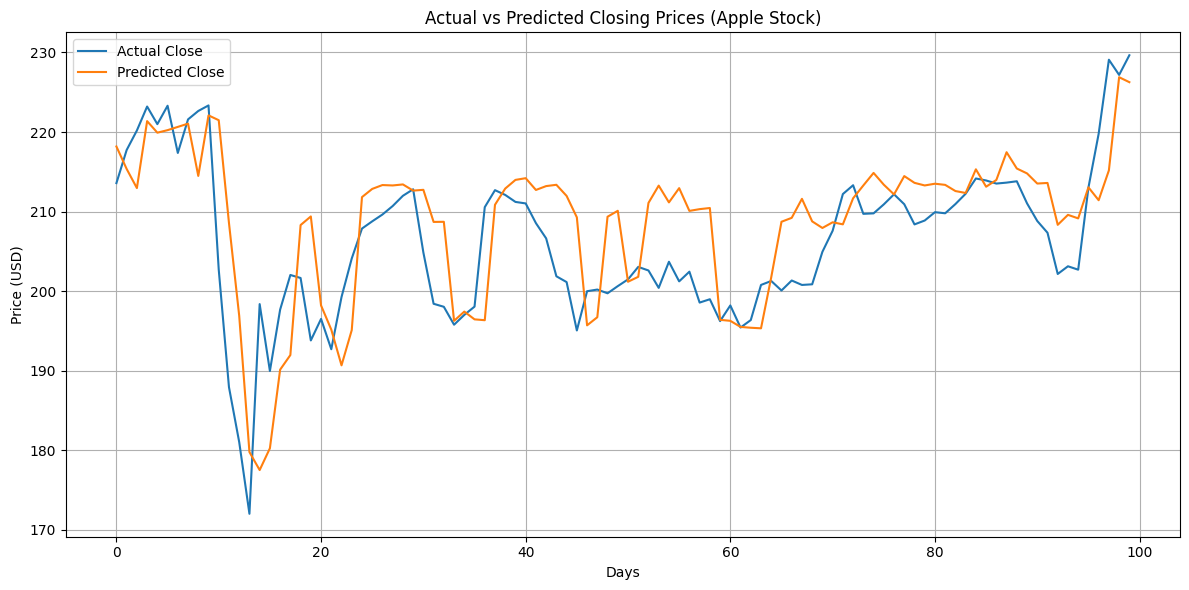


Mean Squared Error: 54.55


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Download Apple stock data (last 2 years)
df = yf.download("AAPL", period="2y")

# Create target column: next day's closing price
df["Next_Close"] = df["Close"].shift(-1)
df = df.dropna()

# Features and target
X = df[["Open", "High", "Low", "Volume"]]
y = df["Next_Close"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Display first 10 predictions vs actual
print("\nPredicted vs Actual Closing Prices (First 10):")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(y_pred, label="Predicted Close")
plt.title("Actual vs Predicted Closing Prices (Apple Stock)")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", round(mse, 2))


# New Section